In [1]:
# import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


def load_data():
    url= 'coffee_ratings.csv'
    df = pd.read_csv(url)
    df_interin = df.copy()
    df_interin = df_interin[['total_cup_points',
                             'species',
                             'country_of_origin',
                             'variety',
                             'aftertaste',
                             'acidity',
                             'aroma',
                             'body',
                             'balance',
                             'sweetness',
                             'altitude_mean_meters',
                             'moisture']]
    
    df_interin = df_interin.dropna()
    df_interin['species'] = pd.Categorical(df_interin['species'])
    df_interin['country_of_origin'] = pd.Categorical(df_interin['country_of_origin'])
    df_interin['variety'] = pd.Categorical(df_interin['variety'])
    df_interin['speciality'] = df_interin['total_cup_points'].apply(lambda x: 'yes' if x>82.43 else 'no')
    df_interin['speciality'] = pd.Categorical(df_interin['speciality'])
    df_interin['altitude_mean_meters'] = df_interin['altitude_mean_meters'].apply(lambda x:1300 if x>10000 else x)
    df = df_interin.copy()
    return df

df_ch =load_data()
#st.write(df_ch.shape[0])  ## Para traer las filas

In [2]:
df_ch.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 1 to 1333
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   total_cup_points      997 non-null    float64 
 1   species               997 non-null    category
 2   country_of_origin     997 non-null    category
 3   variety               997 non-null    category
 4   aftertaste            997 non-null    float64 
 5   acidity               997 non-null    float64 
 6   aroma                 997 non-null    float64 
 7   body                  997 non-null    float64 
 8   balance               997 non-null    float64 
 9   sweetness             997 non-null    float64 
 10  altitude_mean_meters  997 non-null    float64 
 11  moisture              997 non-null    float64 
 12  speciality            997 non-null    category
dtypes: category(4), float64(9)
memory usage: 84.6 KB


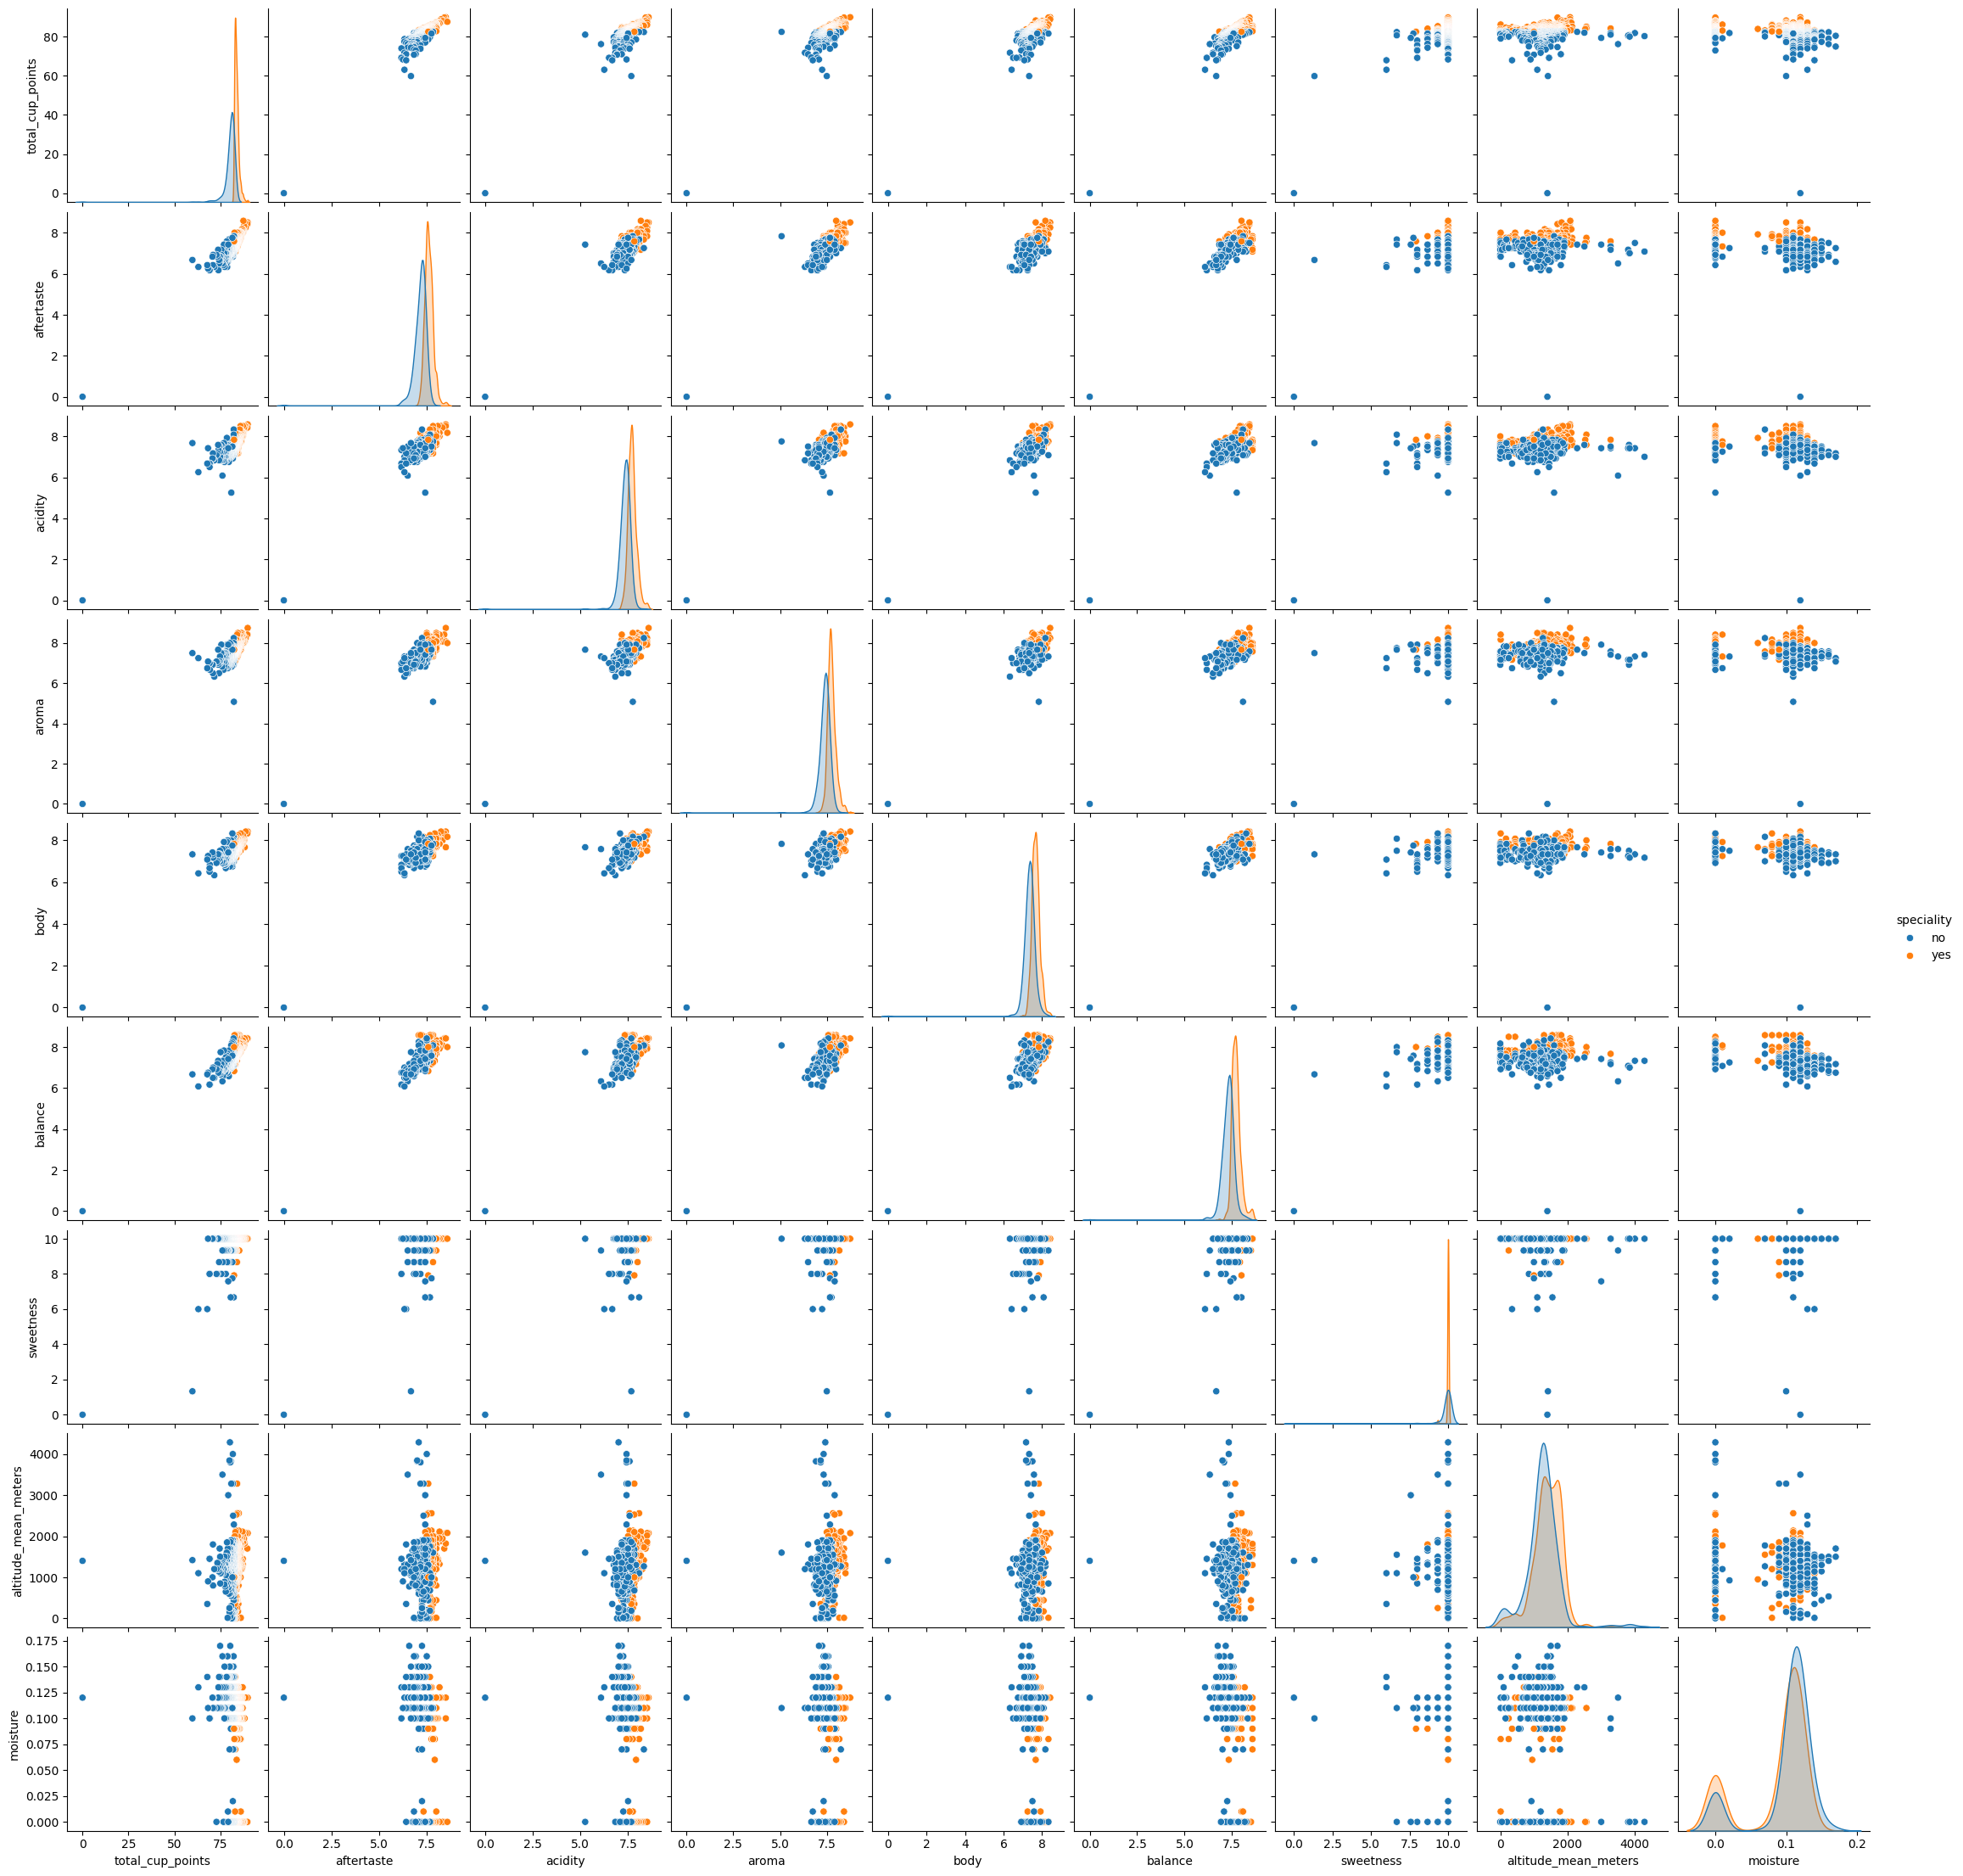

In [3]:
sns.pairplot(data=df_ch.drop(['species','country_of_origin','variety'],axis=1), hue ='speciality')
plt.show()

In [4]:
df_ch.drop(['species','country_of_origin','variety'],axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
total_cup_points,997.0,82.026078,3.688091,0.0,81.17,82.42,83.58,89.92
aftertaste,997.0,7.376399,0.404112,0.0,7.17,7.42,7.58,8.58
acidity,997.0,7.514654,0.384867,0.0,7.33,7.50,7.67,8.58
aroma,997.0,7.558877,0.384985,0.0,7.42,7.58,7.75,8.75
body,997.0,7.496369,0.359624,0.0,7.33,7.50,7.67,8.42
balance,997.0,7.491755,0.414074,0.0,7.33,7.50,7.67,8.58
sweetness,997.0,9.914915,0.541567,0.0,10.00,10.00,10.00,10.00
altitude_mean_meters,997.0,1323.822360,470.716605,1.0,1100.00,1310.64,1600.00,4287.00
moisture,997.0,0.093811,0.044326,0.0,0.10,0.11,0.12,0.17


In [5]:
df_ch.columns

Index(['total_cup_points', 'species', 'country_of_origin', 'variety',
       'aftertaste', 'acidity', 'aroma', 'body', 'balance', 'sweetness',
       'altitude_mean_meters', 'moisture', 'speciality'],
      dtype='object')

In [6]:
df_ch.drop(['species','country_of_origin','variety'],axis=1)

,total_cup_points,aftertaste,acidity,aroma,body,balance,sweetness,altitude_mean_meters,moisture,speciality
1,89.92,8.50,8.58,8.75,8.42,8.42,10.00,2075.00,0.12,yes
2,89.75,8.42,8.42,8.42,8.33,8.42,10.00,1700.00,0.00,yes
4,88.83,8.25,8.50,8.25,8.42,8.33,10.00,2075.00,0.12,yes
9,88.25,8.50,8.50,8.08,7.67,8.42,10.00,1822.50,0.10,yes
11,87.92,8.17,8.33,8.25,8.08,8.17,10.00,1872.00,0.00,yes
...,...,...,...,...,...,...,...,...,...,...
1309,59.83,6.67,7.67,7.50,7.33,6.67,1.33,1417.32,0.10,no
1310,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1400.00,0.12,no
1319,82.50,7.58,7.83,7.67,7.83,8.00,7.92,1000.00,0.09,yes
1322,81.58,7.75,7.50,7.67,7.75,7.58,7.75,1000.00,0.11,no


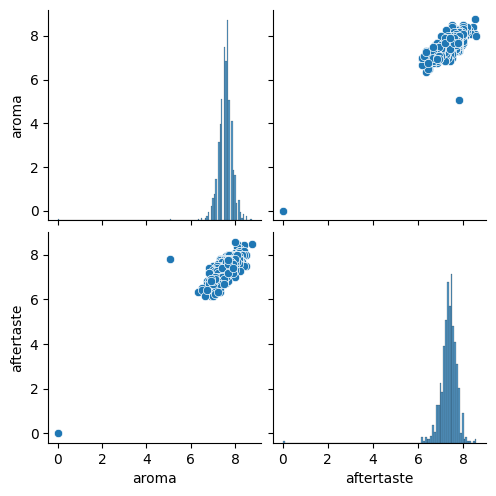

In [8]:
sns.pairplot(data=df_ch[['aroma','aftertaste']])
plt.show()